<a href="https://colab.research.google.com/github/shengy90/basic-econometrics-/blob/master/chapter_1_the_nature_of_regression_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt 

% matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### **Load data from github**


In [0]:
import pandas as pd 
url_table1_3 = "https://raw.githubusercontent.com/shengy90/basic-econometrics-/master/datasets/table1_3.csv"
url_table1_4 = "https://raw.githubusercontent.com/shengy90/basic-econometrics-/master/datasets/table1_4.csv"
url_table1_5 = "https://raw.githubusercontent.com/shengy90/basic-econometrics-/master/datasets/table1_5.csv"
url_table1_6 = "https://raw.githubusercontent.com/shengy90/basic-econometrics-/master/datasets/table1_6.csv"
table1_3 = pd.read_csv(url_table1_3, thousands=r',')
table1_4 = pd.read_csv(url_table1_4, thousands=r',')
table1_5 = pd.read_csv(url_table1_5, thousands=r',')
table1_6 = pd.read_csv(url_table1_6, thousands=r',')

In [3]:
table1_3.index = table1_3['Year']
table1_3.drop(columns=['Year'], inplace=True)
table1_3.head(5)

,USA,Canada,Japan,France,Germany,Italy,UK
Year,,,,,,,
1980,82.4,76.1,90.9,72.3,86.7,63.2,78.5
1981,90.9,85.6,95.3,81.9,92.2,75.4,87.9
1982,96.5,94.9,98.1,91.7,97.1,87.7,95.4
1983,99.6,100.4,99.8,100.4,100.3,100.8,99.8
1984,103.9,104.7,102.1,108.1,102.7,111.5,104.8


In [4]:
table1_4.index = table1_4['Period']
table1_4.drop(columns=['Period'], inplace=True)
table1_4

,Australia,Canada,China,Japan,Mexico,South Korea,Sweden,Switzerland,United Kingdom
Period,,,,,,,,,
1985,0.7003,1.3659,2.9434,238.47,0.257,872.45,8.6032,2.4552,1.2974
1986,0.6709,1.3896,3.4616,168.35,0.612,884.60,7.1273,1.7979,1.4677
1987,0.7014,1.3259,3.7314,144.60,1.378,826.16,6.3469,1.4918,1.6398
1988,0.7841,1.2306,3.7314,128.17,2.273,734.52,6.1370,1.4643,1.7813
1989,0.7919,1.1842,3.7673,138.07,2.461,674.13,6.4559,1.6369,1.6382
1990,0.7807,1.1668,4.7921,145.00,2.813,710.64,5.9231,1.3901,1.7841
1991,0.7787,1.1460,5.3337,134.59,3.018,736.73,6.0521,1.4356,1.7674
1992,0.7352,1.2085,5.5206,126.78,3.095,784.66,5.8258,1.4064,1.7663
1993,0.6799,1.2902,5.7795,111.08,3.116,805.75,7.7956,1.4781,1.5016


## **Question 1**

**Table 1.3 gives data on the Consumer Price Index (CPI) for seven industrialised countries with 1982 - 1984 = 1000 as the base of the index**

##### **a. From the given data, compute the inflation rate for each country *(subtract the CPI of the previous year from the current year, and multiply by 100. Inflation rate of Canada for 1981 is [(85.6-76.1)/76.1] X 100 = 12.45% (approx)*).**

In [0]:
def calc_inflation_rate(input_df):
    countries = input_df.columns
    output_df = pd.DataFrame(columns=countries, index = input_df.index)
    for country in countries:
        output_df[country] = (input_df[country] - input_df[country].shift(1))/input_df[country].shift(1)*100
    return output_df 

table1_3a = calc_inflation_rate(table1_3)
assert np.round(table1_3a.loc[1981, 'Canada'],2) == 12.48

##### **b. Plot the inflation rate for each country against time (i.e. use the horizontal axis for time and vertical axis for the inflation rate).**

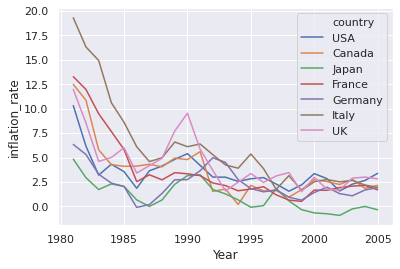

In [15]:
countries = table1_3a.columns
table1_3a.reset_index(inplace=True)
table1_3b = pd.melt(table1_3a, id_vars=['Year'], value_vars=countries, var_name='country', value_name='inflation_rate')
sns.lineplot(x='Year', y='inflation_rate', hue='country', data=table1_3b)

##### **c. What broad conclusions can you draw about the inflation experience in the seven countries?**

Ans: Inflation rate was very between in 1981 and slowly stabilised towards 1985, before creeping up again in 1990 and slowly stabilised towards the 2000s.

##### **d. Which country's inflation rate seems to be the most variable. Can you offer any explanation?**

UK's inflation rate looks to be the most volatile amongst the 7 countries. This could be due to the rocky economic climate in the UK in the 1980s - 1990s e.g. events such as:

*   Recession of 1981 which affected most OECD countries (as seen from the chart above)
*   Recession of 1991/ Lawson Boom of the late 80s. 



## **Question 2**

##### **a. Using `table1_3` plot the inflation rate of Canada, France, Germany, Italy, Japan and the UK against the US inflation rate.**

In [0]:
table1_3_12a = calc_inflation_rate(table1_3)
countries = ['Canada', 'Japan', 'France', 'Germany', 'Italy', 'UK']
table1_3_12a.reset_index(inplace=True)
table1_3_12a = pd.melt(table1_3_12a, id_vars=['USA'], value_vars=countries, var_name='country', value_name='inflation_rate')
table1_3_12a.dropna(inplace=True)

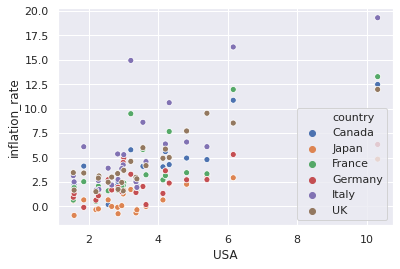

In [26]:
sns.scatterplot(x='USA', y='inflation_rate', hue='country', data=table1_3_12a)

##### **b. Comment generally about the behaviour of the inflation rate in the six countries vis-à-vis the U.S. inflation rate.**

Ans: The inflation rates of the 6 countries are generally positively correlated with US's inflation rate. 

##### **c. If you find that the six countries' inflation rates move in the same direction as the U.S. infaltion rate, would you suggest that U.S. inflation "causes" inflation in the other countries? Why or why not?**

Ans: Not necessarily. Correlation does not imply causation. There could be a confounder causing all inflation rates to behave the same way, e.g. oil prices causing supply-side inflation etc.

## **Question 3**

**Table 1.4 gives the foreign exchange rates for 9 industrialised countries for the years 1985-2006. Except for the UK, the exchange rate is defined as the units of foreign currency for 1 U.S. dollar; for the UK, it is defined as the number of U.S. dollar for 1 UK pound.**

##### **a. Plot these exchange rates against time and comment on the general behaviour of the exchange rates over the given time period.**

In [0]:
q3a = table1_4.copy()
q3a['United Kingdom'] = 1/q3a['United Kingdom']
q3a['South Korea'] = q3a['South Korea']/1000 # scale south korea exchange rate so that it's comparable against other currencies
q3a['Japan'] = q3a['Japan']/100 # scale Japan exchange rate so that it's comparable against other currencies
q3a['Sweden'] = q3a['Sweden']/10
q3a['Mexico'] = q3a['Mexico']/10
q3a['China'] = q3a['China']/10



countries = q3a.columns
q3a.reset_index(inplace=True)
q3a = pd.melt(q3a, id_vars=['Period'], value_vars=countries, var_name='country', value_name='exchange_rate')

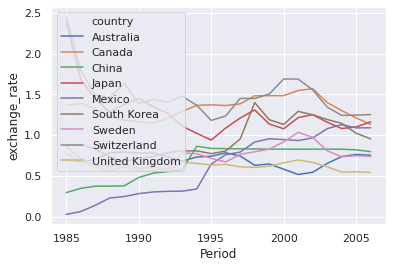

In [35]:
sns.lineplot(x='Period', y='exchange_rate', hue='country', data=q3a)

##### **b. The dollar is said to appreciate if it can buy more units of a foreign currency. Contrarily, it is said to depreciate if it buys fewer units of a foreign currency. Over the time period 1985-2006, what has been the general behaviour of the U.S.dollar? Incidentally, look up any textbook on macroeconomics or international economics to find out what factors determine the appreciation or depreciation of a currency**.

Over this time period, USD has appreciated against currencies of the developing world (China, Mexico). It's stayed largely the same agaisnt other currencies of the developed world except Australia and Canada which it's depreciated against in the late 80s. 

Factors that affect appreciation/ depreciation of a currency includes:
- central bank's interest rate 
- inflation rate of a country
- political/ economic stability
- balance of trade 

## **Question 4**

**The data behind the M1 money suply in Figure 1.5 are given in Table 1.5. Can you give reasons why the money supply has been increasing over the timeperiod shown in the table?**

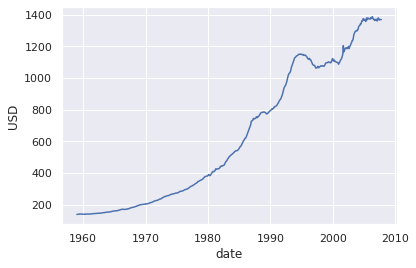

In [44]:
q5 = table1_5.copy()
q5['Day'] = 1 
q5['date'] = pd.to_datetime(q5[['Year','Month','Day']])
sns.lineplot(x='date',y='USD',data=q5)

Ans: https://libertystreeteconomics.newyorkfed.org/2012/05/whats-driving-up-money-growth.html

## **Question 7**

**The data presented in `table1_6` were published in the March 1, 1984, issue of The Wall Street Journal. They relate tot he advertising budget (in million of dollars) of 21 firms for 1983 and millions of impressions retained per week by the viewers of the products of these firms. The data are based on a survey of 4000 adults in which users of the products were asked to cite a commercial they had seen for the product category in the past week.**

##### **a. Plot impressions on the vertical axis and advertising expenditure on the horizontal axis.**

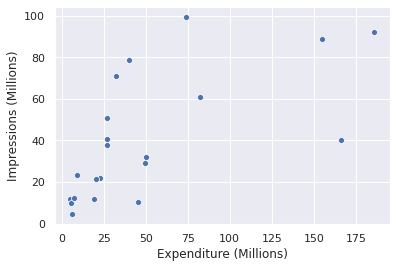

In [47]:
sns.scatterplot(x='Expenditure (Millions)', y='Impressions (Millions)', data=table1_6)

##### **b. What can you say about the nature of the relationship between the two variables?**

They follow a log-linear relationship i.e. there's a diminishing return curve to the impressions delivered as expenditure increases.

##### **c. Looking at your graph, do you think it pays to advertise? Think about all those commercials shown on Super Bowl Sunday or during the World Series.**

As long as the incremental revenue brought in via advertising is higher than the advertising cost + cost associated to generate these revenue, it'll be worth it to pay for advertising. 

For instance if spending £500K on advertising generates £1M extra revenue, of which costed £400K to generate (through operation cost, cost of goods sold etc), the firm would make a net profit of £100K through advertising spend, which is a return of investment of 20% (£100K net profit divided by £500K advertising spend).